In [1]:
#1.import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#2.load your dataset
df=pd.read_csv(r"C:\Users\user\Downloads\Bank Customer Churn Prediction.csv.csv")
df.head(8)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [3]:
9#3.exploring data analysis (eda)
df.shape    #check the dataset shape

(10000, 12)

In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()   #summarize statistics

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#4.handling missing values  ------> if there are missing values fill with mean numeric values
#fill categorical missing values with mode
print(df.isnull().sum())   #checking for missing values

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [7]:
#5.handling duplicates  -------> if there are duplicates just drop it
print("duplicate rows:",df.duplicated().sum())

duplicate rows: 0


In [8]:
#6.handling outliers using two methods iqr and z-score
#iqr method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound, upper_bound)

14.0 62.0


In [9]:
df.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
#7.encoding categorical variables using one hot encoding
df_encoded=pd.get_dummies(df) #find all cat automatically and convert it to binary
df_encoded.columns  #shows all col names after encoding like new dummy var were created and original catergorical col are gone


Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'],
      dtype='object')

In [11]:
# 8. Scaling
# Scaling is used to bring all feature values to the same scale
# IMPORTANT: Target variable ('churn') must NOT be scaled

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric feature columns (exclude target)
numeric_cols = df_encoded.drop(columns=['churn']).select_dtypes(include=np.number).columns

# Apply scaling only on feature columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# View scaled feature data
df_encoded[numeric_cols]


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [12]:
#9.feature eng
df_encoded['High_Balance'] = (df_encoded['balance'] > df_encoded['balance'].median()).astype(int)
df_encoded['High_Balance'].value_counts()


High_Balance
0    5000
1    5000
Name: count, dtype: int64

In [13]:
df_encoded.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male', 'High_Balance'],
      dtype='object')

In [14]:
#10.splitting data to train adn test
X = df_encoded.drop('churn', axis=1)   # Input features
y = df_encoded['churn']               # Target (Churn)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8000, 15)
Testing set shape: (2000, 15)


In [15]:
X_train.head(10)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,High_Balance
2151,-1.422534,1.060247,1.723821,0.687130,-1.225848,-0.911583,0.646092,-1.030670,1.032643,True,False,False,False,True,0
8392,-0.692073,0.915392,-0.660018,-0.695982,0.410973,-0.911583,0.646092,-1.030670,-0.627897,False,True,False,False,True,1
5006,0.821233,1.080940,-0.183251,-1.733315,0.599083,0.807737,0.646092,0.970243,0.300934,False,True,False,True,False,1
4117,-0.375026,-0.926334,-0.183251,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.295561,True,False,False,False,True,0
7182,-1.632370,0.429093,0.960993,0.341352,0.545796,0.807737,-1.547768,0.970243,0.128379,False,True,False,False,True,1
3522,-0.638036,0.087650,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,0.568950,True,False,False,True,False,0
8783,-1.027192,1.360303,-0.469311,1.378686,-1.225848,-0.911583,0.646092,-1.030670,1.442084,True,False,False,False,True,0
741,0.359982,-1.081536,-1.422847,1.032908,1.279596,-0.911583,0.646092,0.970243,0.439781,True,False,False,False,True,1
1319,1.010271,1.091287,0.198164,-1.041760,0.768558,0.807737,-1.547768,0.970243,-0.921567,False,True,False,False,True,1
2922,0.197024,0.356666,-0.469311,0.341352,0.108638,-0.911583,-1.547768,-1.030670,-1.572434,False,False,True,False,True,0


In [16]:
y_train.head(10)

2151    1
8392    1
5006    0
4117    0
7182    0
3522    0
8783    1
741     0
1319    0
2922    0
Name: churn, dtype: int64

In [17]:
df_encoded.to_csv(
    r"C:\Users\user\Downloads\bank_churn_cleaned.csv",
    index=False
)

print("Data saved successfully")


Data saved successfully


In [18]:
y.value_counts()


churn
0    7963
1    2037
Name: count, dtype: int64

In [19]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [20]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

log_acc = accuracy_score(y_test, y_pred_log)
log_roc = roc_auc_score(y_test, y_prob_log)

print("🔹 Logistic Regression Results")
print("Accuracy:", log_acc)
print("ROC-AUC:", log_roc)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.714
ROC-AUC: 0.7770929635336415
[[1141  452]
 [ 120  287]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



In [21]:
# 10. Model Evaluation
# ================================

# Predictions
y_pred =log_model.predict(X_test)

# Prediction probabilities
y_prob = log_model.predict_proba(X_test)[:, 1]

In [22]:
# 11. Performance Metrics
# ================================
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)



Accuracy: 0.714
Confusion Matrix:
 [[1141  452]
 [ 120  287]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

ROC-AUC Score: 0.7770929635336415


In [26]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Features Influencing Churn:\n")
print(feature_importance)



Top Features Influencing Churn:

             Feature  Importance
2                age    0.288294
5    products_number    0.190047
4            balance    0.099228
8   estimated_salary    0.072341
1       credit_score    0.068983
0        customer_id    0.068422
7      active_member    0.049636
10   country_Germany    0.042897
3             tenure    0.042279
14      High_Balance    0.017156
9     country_France    0.013915
12     gender_Female    0.013686
13       gender_Male    0.013597
11     country_Spain    0.009809
6        credit_card    0.009711


In [27]:
#pushing higher 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import pandas as pd
import joblib

# 3. Random Forest (High LPA Upgrade)
# ===============================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_prob_rf)

print("\n🔹 Random Forest Results")
print("Accuracy:", rf_acc)
print("ROC-AUC:", rf_roc)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




🔹 Random Forest Results
Accuracy: 0.8415
ROC-AUC: 0.8599446904531649
[[1426  167]
 [ 150  257]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.63      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



In [28]:
# 4. Model Comparison Table (INTERVIEW GOLD)
# ===============================
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc],
    "ROC_AUC": [log_roc, rf_roc]
})

print("\n📊 Model Comparison")
print(comparison)



📊 Model Comparison
                 Model  Accuracy   ROC_AUC
0  Logistic Regression    0.7140  0.777093
1        Random Forest    0.8415  0.859945


In [29]:
import joblib

joblib.dump(rf_model, "bank_churn_model.pkl")


['bank_churn_model.pkl']

In [30]:
import pickle

pickle.dump(rf_model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [31]:
#📌 Business Problem

# The bank wants to predict which customers are likely to churn so they can take proactive retention actions.

#Churn prediction helps:

#Reduce revenue loss

#Improve customer retention strategy

#Target high-risk customers with offers

In [32]:
scaler.feature_names_in_


array(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member',
       'estimated_salary'], dtype=object)

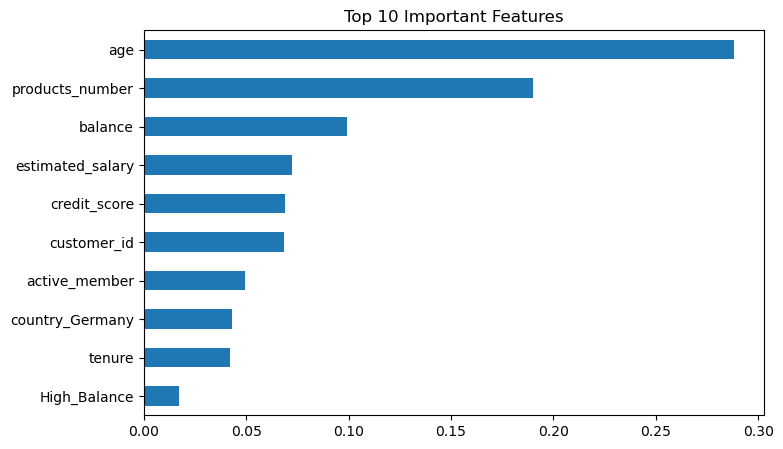

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [34]:
#👉 Is the model stable?
#👉 Or did we just get lucky with one split?

#🔹 Add Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=5,
    scoring='roc_auc'
)

print("Cross Validation ROC-AUC Scores:", cv_scores)
print("Average ROC-AUC:", cv_scores.mean())


Cross Validation ROC-AUC Scores: [0.85153556 0.86349025 0.85776223 0.86126651 0.8530256 ]
Average ROC-AUC: 0.8574160275601962


In [35]:
#🔥 Hyperparameter Tuning (GridSearch)
#Right now you manually set parameters.
#Now we find the best combination automatically.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}



In [36]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,  # reduced folds
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC: 0.8601420208852902


making project into usable real world banking

In [39]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [40]:
X = X.drop("customer_id", axis=1)


In [41]:
cat_cols = ["country", "gender"]
num_cols = [col for col in X.columns if col not in cat_cols]


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'gender'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8635
ROC-AUC: 0.8562530975328991


In [46]:
import joblib

joblib.dump(pipeline, "bank_churn_pipeline.pkl")


['bank_churn_pipeline.pkl']